In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#df1 = pd.read_parquet('yellow_tripdata_2020-03.parquet', engine='fastparquet')
df2 = pd.read_parquet('yellow_tripdata_2020-01.parquet', engine='fastparquet')

In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,3007687.0,1.671989,0.472886,1.00,1.00,2.00,2.00,6.00
passenger_count,2969879.0,1.467477,1.120087,0.00,1.00,1.00,1.00,9.00
trip_distance,3007687.0,3.117041,206.920728,0.00,1.00,1.67,3.02,269803.73
RatecodeID,2969879.0,1.051377,0.710921,1.00,1.00,1.00,1.00,99.00
PULocationID,3007687.0,163.429781,66.586537,1.00,114.00,162.00,234.00,265.00
DOLocationID,3007687.0,160.933627,70.741316,1.00,107.00,162.00,234.00,265.00
payment_type,3007687.0,1.251811,0.494120,0.00,1.00,1.00,2.00,4.00
fare_amount,3007687.0,12.697643,387.129705,-1259.00,6.50,9.00,14.00,671100.14
extra,3007687.0,1.246796,288.308527,-7.00,0.00,0.50,2.50,500000.80
mta_tax,3007687.0,0.658038,288.306018,-0.50,0.50,0.50,0.50,500000.50


In [4]:
import tensorflow_data_validation as tfdv

In [5]:
train_stats = tfdv.generate_statistics_from_dataframe(df1)
tfdv.visualize_statistics(train_stats)

In [5]:
#size of the dataset
df1.shape

(3007687, 19)

In [6]:
# 1 object datatype
# 2 datatime datatype
# 4 int datatype
# 11 float datatype
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007687 entries, 0 to 3007686
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
# check if dataframe has any null values
df1.isnull().values.any()

True

In [8]:
df1.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            37808
trip_distance                  0
RatecodeID                 37808
store_and_fwd_flag         37808
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       37808
airport_fee              3007687
dtype: int64

### Data Transformation

In [9]:
# Separate features
df1 = df1.drop(['airport_fee'], axis = 1)

## Added the new column to calculate trip duration

In [10]:
df1.insert(loc=1,column='TripTime',value='0')

In [11]:
df1['TripTime'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60
df1

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,30.483333,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.00,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2,0.450000,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1,6.966667,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.00,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2,3.066667,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.00,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1,15.133333,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.50,3.0,0.5,4.05,0.0,0.3,24.35,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007682,2,12.000000,2020-03-31 23:21:00,2020-03-31 23:33:00,NaN,5.43,NaN,None,137,87,0,30.47,0.0,0.5,0.00,0.0,0.3,33.77,NaN
3007683,2,29.000000,2020-03-31 23:57:00,2020-04-01 00:26:00,NaN,13.21,NaN,None,137,71,0,37.97,0.0,0.5,0.00,0.0,0.3,41.27,NaN
3007684,2,21.850000,2020-03-31 23:22:01,2020-03-31 23:43:52,NaN,12.14,NaN,None,137,32,0,37.10,0.0,0.0,0.00,0.0,0.3,39.90,NaN
3007685,2,13.466667,2020-03-31 23:18:53,2020-03-31 23:32:21,NaN,7.01,NaN,None,137,159,0,20.07,0.0,0.0,0.00,0.0,0.3,22.87,NaN


Convert all data into numeric

In [12]:
df1.store_and_fwd_flag.value_counts()

N    2941898
Y      27981
Name: store_and_fwd_flag, dtype: int64

In [13]:
df1 = df1.replace({'N':0,'Y':1})
df1

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,30.483333,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,0.0,88,255,1,22.00,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2,0.450000,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,0.0,193,193,2,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1,6.966667,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,0.0,246,90,1,6.00,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2,3.066667,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,0.0,151,238,1,5.00,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1,15.133333,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,0.0,79,261,1,16.50,3.0,0.5,4.05,0.0,0.3,24.35,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007682,2,12.000000,2020-03-31 23:21:00,2020-03-31 23:33:00,NaN,5.43,NaN,NaN,137,87,0,30.47,0.0,0.5,0.00,0.0,0.3,33.77,NaN
3007683,2,29.000000,2020-03-31 23:57:00,2020-04-01 00:26:00,NaN,13.21,NaN,NaN,137,71,0,37.97,0.0,0.5,0.00,0.0,0.3,41.27,NaN
3007684,2,21.850000,2020-03-31 23:22:01,2020-03-31 23:43:52,NaN,12.14,NaN,NaN,137,32,0,37.10,0.0,0.0,0.00,0.0,0.3,39.90,NaN
3007685,2,13.466667,2020-03-31 23:18:53,2020-03-31 23:32:21,NaN,7.01,NaN,NaN,137,159,0,20.07,0.0,0.0,0.00,0.0,0.3,22.87,NaN


In [14]:
df1['RatecodeID'] = df1['RatecodeID'].replace(np.nan, 1.0)

Vendor Id 

In [15]:
df1.VendorID.value_counts()

2    2018718
1     988484
6        476
5          9
Name: VendorID, dtype: int64

In [16]:
df1 = df1.drop(df1[(df1.VendorID > 2)].index)

In [17]:
df1.VendorID.value_counts()

2    2018718
1     988484
Name: VendorID, dtype: int64

Payment Type

In [18]:
df1.payment_type.value_counts()

1    2211073
2     732096
0      37323
3      17048
4       9662
Name: payment_type, dtype: int64

In [19]:
df1 = df1.drop(df1[(df1.payment_type < 1)].index)

In [20]:
df1.payment_type.value_counts()

1    2211073
2     732096
3      17048
4       9662
Name: payment_type, dtype: int64

### Trip Distance

In [21]:
df1.trip_distance.value_counts()

0.80     52876
0.90     52758
1.00     52048
0.70     50186
1.10     49849
         ...  
61.70        1
34.37        1
36.76        1
31.63        1
46.27        1
Name: trip_distance, Length: 3939, dtype: int64

In [22]:
df1 [df1['trip_distance'] < 0.1]

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1,2,0.450000,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.0,1.0,0.0,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
223,2,0.166667,2020-03-01 00:23:21,2020-03-01 00:23:31,1.0,0.0,2.0,0.0,231,231,4,-52.0,0.0,-0.5,0.00,0.0,-0.3,-55.30,-2.5
224,2,0.166667,2020-03-01 00:23:21,2020-03-01 00:23:31,1.0,0.0,2.0,0.0,231,231,2,52.0,0.0,0.5,0.00,0.0,0.3,55.30,2.5
289,2,0.266667,2020-03-01 00:23:18,2020-03-01 00:23:34,1.0,0.0,5.0,0.0,116,116,1,25.3,0.0,0.0,2.00,0.0,0.3,27.60,0.0
658,1,0.116667,2020-03-01 00:43:19,2020-03-01 00:43:26,1.0,0.0,1.0,0.0,100,100,3,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969720,1,0.950000,2020-03-31 23:58:13,2020-03-31 23:59:10,0.0,0.0,1.0,0.0,142,48,1,2.5,3.0,0.5,1.25,0.0,0.3,7.55,2.5
2969741,2,0.250000,2020-03-31 23:02:50,2020-03-31 23:03:05,1.0,0.0,1.0,0.0,166,75,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2969819,1,24.333333,2020-03-31 23:41:55,2020-04-01 00:06:15,1.0,0.0,1.0,0.0,26,61,1,20.2,0.0,0.5,0.00,0.0,0.3,21.00,0.0
2969843,1,25.050000,2020-03-31 23:01:45,2020-03-31 23:26:48,1.0,0.0,1.0,0.0,230,69,1,28.2,0.0,0.5,0.00,0.0,0.3,29.00,0.0


In [23]:
# 13511 rows are droped
df1 = df1.drop(df1[(df1.trip_distance < 0.1)].index)

In [24]:
df1

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,30.483333,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,0.0,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
2,1,6.966667,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,0.0,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2,3.066667,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,0.0,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1,15.133333,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,0.0,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5
5,1,18.566667,2020-03-01 00:04:43,2020-03-01 00:23:17,1.0,3.50,1.0,1.0,113,142,1,15.0,3.0,0.5,3.75,0.0,0.3,22.55,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969874,2,2.833333,2020-03-31 23:18:36,2020-03-31 23:21:26,5.0,0.52,1.0,0.0,236,236,2,4.0,0.5,0.5,0.00,0.0,0.3,7.80,2.5
2969875,2,10.983333,2020-03-31 23:39:18,2020-03-31 23:50:17,5.0,2.35,1.0,0.0,263,166,1,10.5,0.5,0.5,2.86,0.0,0.3,17.16,2.5
2969876,2,7.100000,2020-03-31 23:24:48,2020-03-31 23:31:54,5.0,1.33,1.0,0.0,140,162,1,7.0,0.5,0.5,2.20,0.0,0.3,13.00,2.5
2969877,2,3.333333,2020-03-31 23:41:03,2020-03-31 23:44:23,6.0,0.87,1.0,0.0,140,229,1,5.0,0.5,0.5,2.64,0.0,0.3,11.44,2.5


### Passenger Count

In [25]:
df1.passenger_count.value_counts()

1.0    2156396
2.0     403427
3.0     105662
5.0      96386
0.0      62464
6.0      59269
4.0      47787
9.0          6
7.0          3
8.0          3
Name: passenger_count, dtype: int64

In [26]:
df1 [df1['passenger_count'] < 1]

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4,1,15.133333,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.4,1.0,0.0,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5
15,1,22.283333,2020-03-01 00:14:43,2020-03-01 00:37:00,0.0,7.2,1.0,0.0,230,244,1,24.5,3.0,0.5,3.00,0.0,0.3,31.30,2.5
16,1,16.850000,2020-03-01 00:56:56,2020-03-01 01:13:47,0.0,3.5,1.0,0.0,263,48,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5
30,1,7.750000,2020-03-01 00:34:01,2020-03-01 00:41:46,0.0,1.0,1.0,0.0,100,170,1,6.5,3.0,0.5,2.05,0.0,0.3,12.35,2.5
31,1,15.433333,2020-03-01 00:49:49,2020-03-01 01:05:15,0.0,2.1,1.0,0.0,234,144,1,11.0,3.0,0.5,1.48,0.0,0.3,16.28,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969795,1,10.250000,2020-03-31 23:46:24,2020-03-31 23:56:39,0.0,2.9,1.0,0.0,43,140,3,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5
2969837,1,4.866667,2020-03-31 23:28:00,2020-03-31 23:32:52,0.0,1.2,1.0,0.0,236,75,2,6.0,3.0,0.5,0.00,0.0,0.3,9.80,2.5
2969838,1,4.750000,2020-03-31 23:38:51,2020-03-31 23:43:36,0.0,1.2,1.0,0.0,75,24,1,6.0,0.5,0.5,2.15,0.0,0.3,9.45,0.0
2969850,1,9.933333,2020-03-31 23:09:28,2020-03-31 23:19:24,0.0,5.5,1.0,0.0,141,88,2,16.5,3.0,0.5,0.00,0.0,0.3,20.30,2.5


In [27]:
# dropped a row which timespan was 16.96 hours
df1 = df1.drop(df1[(df1.passenger_count < 1)].index)
df1 = df1.drop(df1[(df1.passenger_count > 6)].index)

In [28]:
df1.passenger_count.value_counts()

1.0    2156396
2.0     403427
3.0     105662
5.0      96386
6.0      59269
4.0      47787
Name: passenger_count, dtype: int64

### Trip Duration

In [29]:
df1.TripTime.value_counts()

6.166667       3540
6.133333       3460
6.333333       3458
7.516667       3411
6.500000       3402
               ... 
104.400000        1
1353.833333       1
95.933333         1
89.000000         1
1018.683333       1
Name: TripTime, Length: 9641, dtype: int64

In [30]:
#47,462 minutes equals to 791 hours and trip_distance=4 miles with total_amount=21.34$
df1 [df1['TripTime'] < 0]

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2390073,1,-47462.616667,2020-03-13 06:20:37,2020-02-09 07:18:00,1.0,4.0,1.0,0.0,7,43,1,14.5,2.5,0.5,3.55,0.0,0.3,21.35,2.5


In [31]:
#785 [triptime = 0.41sec  distance=4.90miles] but payment_type = 4(dispute)
df1 [df1['TripTime'] < 1]

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
302,2,0.700000,2020-03-01 00:54:44,2020-03-01 00:55:26,1.0,0.15,1.0,0.0,164,164,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-6.3,-2.5
303,2,0.700000,2020-03-01 00:54:44,2020-03-01 00:55:26,1.0,0.15,1.0,0.0,164,164,2,2.5,0.5,0.5,0.0,0.0,0.3,6.3,2.5
785,1,0.416667,2020-03-01 00:18:35,2020-03-01 00:19:00,1.0,4.90,1.0,0.0,114,114,4,2.5,3.0,0.5,0.0,0.0,0.3,6.3,2.5
864,1,0.083333,2020-03-01 00:46:07,2020-03-01 00:46:12,6.0,0.50,1.0,0.0,158,158,2,2.5,3.0,0.5,0.0,0.0,0.3,6.3,2.5
905,1,0.633333,2020-03-01 00:58:44,2020-03-01 00:59:22,1.0,0.20,1.0,0.0,162,170,1,3.0,3.0,0.5,1.0,0.0,0.3,7.8,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968502,1,0.066667,2020-03-31 18:23:52,2020-03-31 18:23:56,1.0,0.90,1.0,0.0,41,41,3,2.5,1.0,0.5,0.0,0.0,0.3,4.3,0.0
2968719,2,0.783333,2020-03-31 19:48:24,2020-03-31 19:49:11,1.0,0.33,1.0,0.0,140,262,2,3.0,1.0,0.5,0.0,0.0,0.3,7.3,2.5
2968929,2,0.916667,2020-03-31 19:39:31,2020-03-31 19:40:26,1.0,0.35,1.0,0.0,75,74,2,3.0,1.0,0.5,0.0,0.0,0.3,4.8,0.0
2969404,2,0.266667,2020-03-31 21:14:39,2020-03-31 21:14:55,1.0,0.12,1.0,0.0,234,234,2,2.5,0.5,0.5,0.0,0.0,0.3,6.3,2.5


In [33]:
# 31623 rows are droped
df1 = df1.drop(df1[(df1.TripTime < 1)].index)

In [34]:
# dropped a row which timespan was 16.96 hours
df1 = df1.drop(df1[(df1.TripTime > 100)].index)
df1

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,30.483333,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,0.0,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
2,1,6.966667,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,0.0,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2,3.066667,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,0.0,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
5,1,18.566667,2020-03-01 00:04:43,2020-03-01 00:23:17,1.0,3.50,1.0,1.0,113,142,1,15.0,3.0,0.5,3.75,0.0,0.3,22.55,2.5
6,1,31.250000,2020-03-01 00:43:21,2020-03-01 01:14:36,1.0,14.10,1.0,1.0,237,14,1,40.5,3.0,0.5,8.85,0.0,0.3,53.15,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969874,2,2.833333,2020-03-31 23:18:36,2020-03-31 23:21:26,5.0,0.52,1.0,0.0,236,236,2,4.0,0.5,0.5,0.00,0.0,0.3,7.80,2.5
2969875,2,10.983333,2020-03-31 23:39:18,2020-03-31 23:50:17,5.0,2.35,1.0,0.0,263,166,1,10.5,0.5,0.5,2.86,0.0,0.3,17.16,2.5
2969876,2,7.100000,2020-03-31 23:24:48,2020-03-31 23:31:54,5.0,1.33,1.0,0.0,140,162,1,7.0,0.5,0.5,2.20,0.0,0.3,13.00,2.5
2969877,2,3.333333,2020-03-31 23:41:03,2020-03-31 23:44:23,6.0,0.87,1.0,0.0,140,229,1,5.0,0.5,0.5,2.64,0.0,0.3,11.44,2.5


In [35]:
df1.isnull().sum()

VendorID                 0
TripTime                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

### Date Time column

In [36]:
df1['year'] = pd.to_datetime(df1['tpep_pickup_datetime']).dt.year
df1['month'] = pd.to_datetime(df1['tpep_pickup_datetime']).dt.month
df1['hour'] = pd.to_datetime(df1['tpep_pickup_datetime']).dt.hour
df1['minute'] = pd.to_datetime(df1['tpep_pickup_datetime']).dt.minute

In [37]:
df1['year'].value_counts()

2020    2855644
2009         10
2008          2
Name: year, dtype: int64

In [38]:
# dropped a rows which year is not 2020 
df1 = df1.drop(df1[(df1.year == 2009)].index)
df1 = df1.drop(df1[(df1.year == 2008)].index)

In [39]:
df1['month'].value_counts()

3    2855255
2        290
1         67
6         14
4          8
5          5
8          3
7          2
Name: month, dtype: int64

In [40]:
# dropped rows other than march 2020
df1 = df1.drop(df1[(df1.month > 3)].index)
df1 = df1.drop(df1[(df1.month < 3)].index)

### Rate Code ID

In [41]:
df1.RatecodeID.value_counts()

1.0     2790047
2.0       52948
3.0        5211
5.0        4868
4.0        2121
99.0         56
6.0           4
Name: RatecodeID, dtype: int64

In [42]:
# dropped a row which ratecode is 99    rate code is not mentioned in meta data
df1 = df1.drop(df1[(df1.RatecodeID == 99)].index)

### Fare amount

In [43]:
df1 [df1['fare_amount'] < 0]

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,hour,minute
803,2,4.166667,2020-03-01 00:59:05,2020-03-01 01:03:15,3.0,0.76,1.0,0.0,148,232,...,-0.5,0.0,0.0,-0.3,-8.8,-2.5,2020,3,0,59
956,2,21.116667,2020-03-01 00:51:42,2020-03-01 01:12:49,1.0,5.55,1.0,0.0,140,179,...,-0.5,0.0,0.0,-0.3,-22.8,-2.5,2020,3,0,51
985,2,5.016667,2020-03-01 00:33:19,2020-03-01 00:38:20,1.0,0.90,1.0,0.0,90,249,...,-0.5,0.0,0.0,-0.3,-9.3,-2.5,2020,3,0,33
1015,2,8.866667,2020-03-01 00:16:05,2020-03-01 00:24:57,1.0,3.01,1.0,0.0,239,74,...,-0.5,0.0,0.0,-0.3,-14.3,-2.5,2020,3,0,16
1237,2,39.233333,2020-03-01 00:27:47,2020-03-01 01:07:01,1.0,16.03,1.0,0.0,68,254,...,-0.5,0.0,0.0,-0.3,-51.3,-2.5,2020,3,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969090,2,1.966667,2020-03-31 20:41:19,2020-03-31 20:43:17,1.0,0.59,1.0,0.0,262,262,...,-0.5,0.0,0.0,-0.3,-7.8,-2.5,2020,3,20,41
2969346,2,14.350000,2020-03-31 21:13:12,2020-03-31 21:27:33,1.0,4.89,1.0,0.0,263,260,...,-0.5,0.0,0.0,-0.3,-20.3,-2.5,2020,3,21,13
2969348,2,3.433333,2020-03-31 21:34:40,2020-03-31 21:38:06,1.0,0.50,1.0,0.0,260,129,...,-0.5,0.0,0.0,-0.3,-5.3,0.0,2020,3,21,34
2969398,2,21.983333,2020-03-31 21:37:06,2020-03-31 21:59:05,1.0,5.99,1.0,0.0,238,7,...,-0.5,0.0,0.0,-0.3,-25.3,-2.5,2020,3,21,37


In [44]:
# dropped a row which fare amount is less than 1 $ 
df1 = df1.drop(df1[(df1.fare_amount < 0)].index)
df1 = df1.drop(df1[(df1.fare_amount > 1000)].index)

In [45]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2846821.0,1.681885,0.465745,1.0,1.00,2.00,2.00,2.00
TripTime,2846821.0,12.988888,9.815153,1.0,6.35,10.40,16.60,99.95
passenger_count,2846821.0,1.501917,1.113465,1.0,1.00,1.00,1.00,6.00
trip_distance,2846821.0,2.859395,3.572210,0.1,1.00,1.68,3.00,96.57
RatecodeID,2846821.0,1.031190,0.242203,1.0,1.00,1.00,1.00,6.00
store_and_fwd_flag,2846821.0,0.008622,0.092451,0.0,0.00,0.00,0.00,1.00
PULocationID,2846821.0,163.884453,66.302571,1.0,116.00,162.00,234.00,265.00
DOLocationID,2846821.0,161.273857,70.483371,1.0,107.00,162.00,234.00,265.00
payment_type,2846821.0,1.255856,0.452302,1.0,1.00,1.00,1.00,4.00
fare_amount,2846821.0,12.219887,10.440686,0.0,6.50,9.00,13.50,460.00


### Exploratory Data Analysis 

In [46]:
train_stats = tfdv.generate_statistics_from_dataframe(df1)
tfdv.visualize_statistics(train_stats)

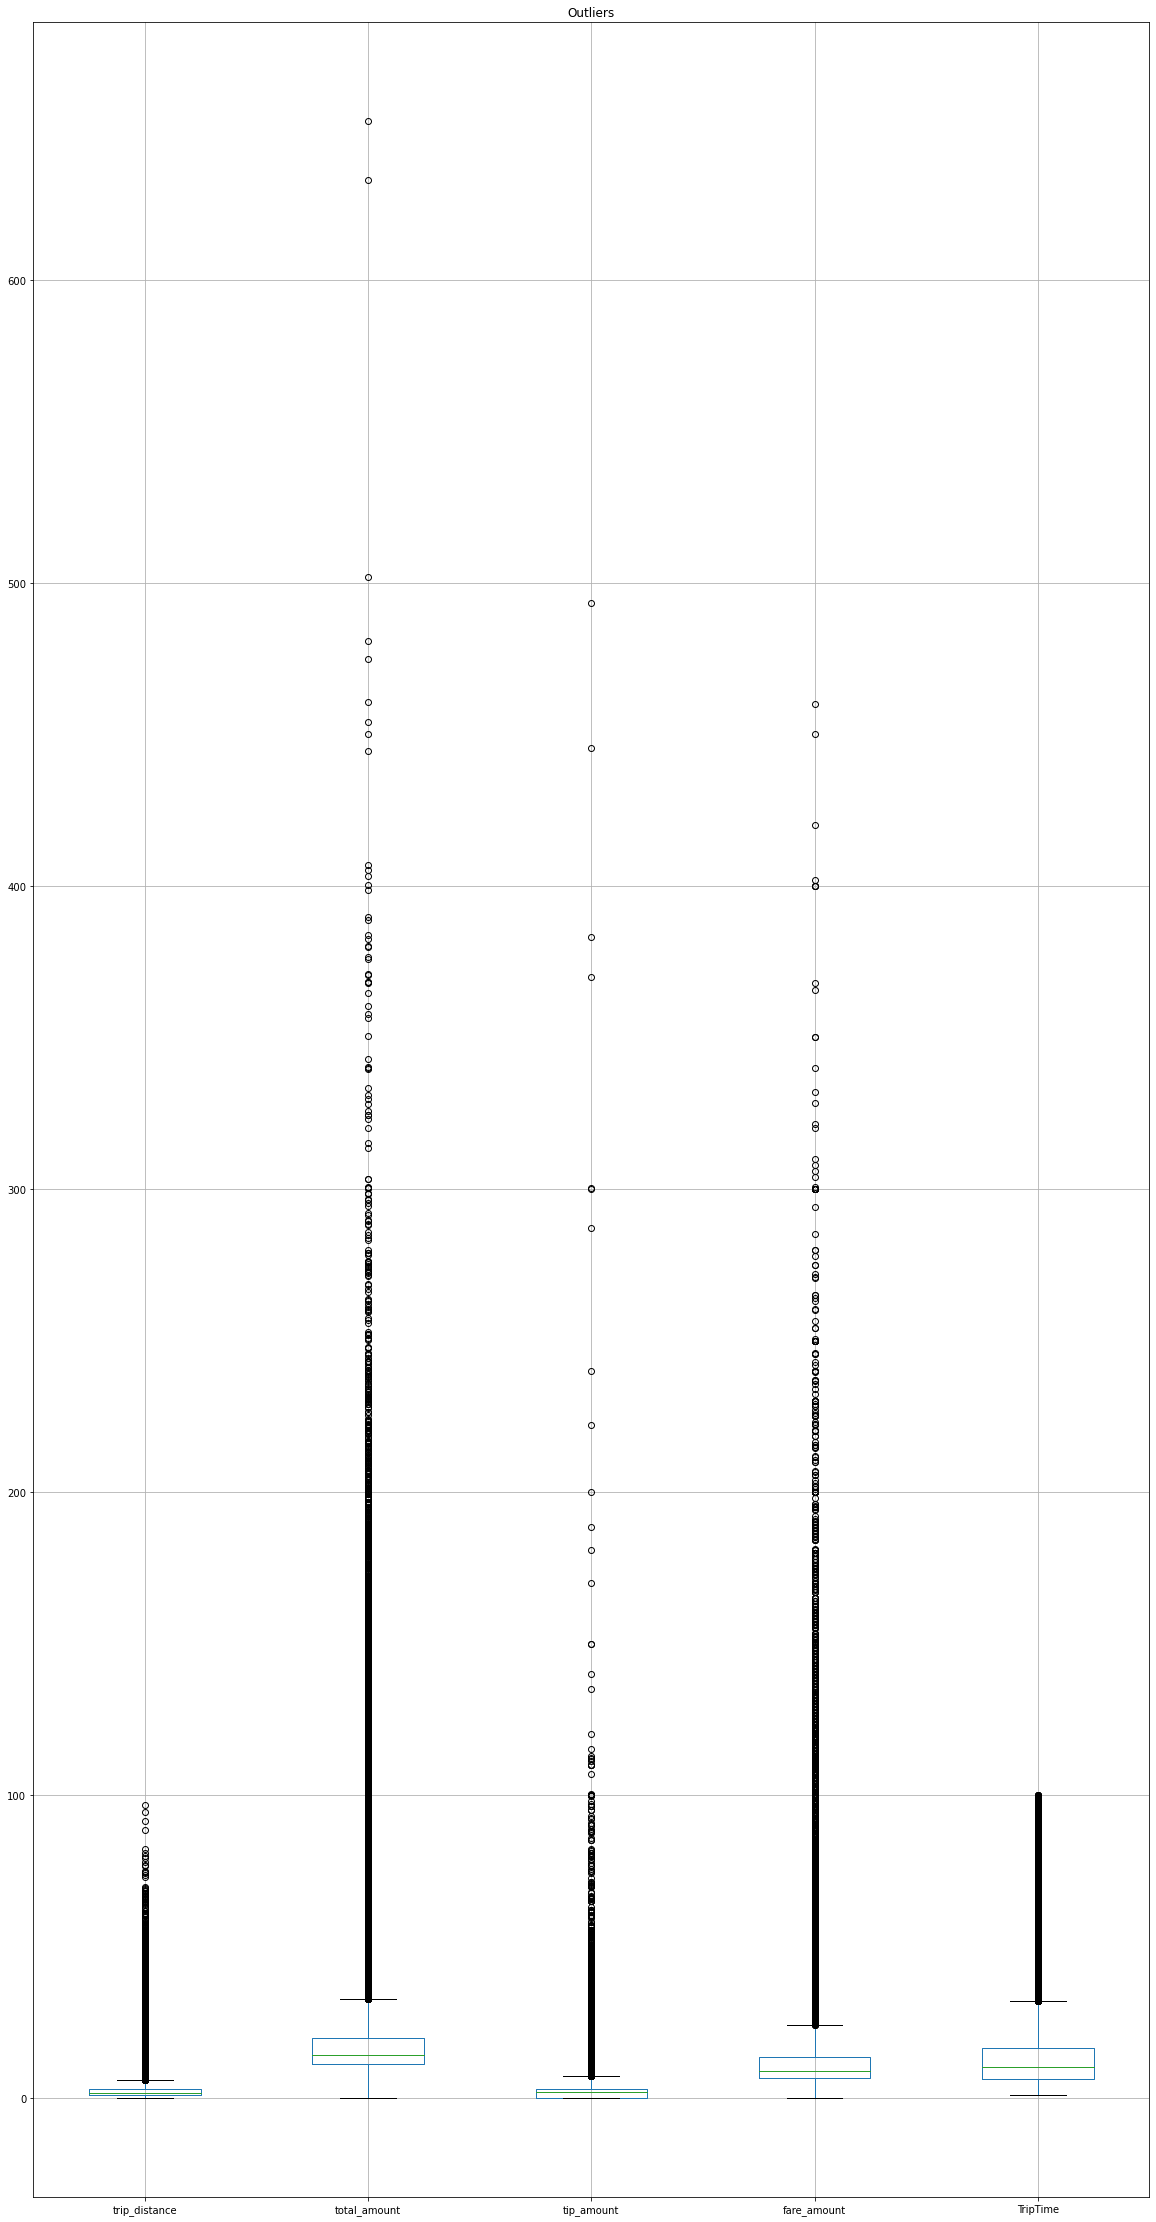

In [47]:
plt.subplots(figsize=(20,40))
plt.title('Outliers')
boxplot = df1.boxplot(column =['trip_distance','total_amount','tip_amount','fare_amount','TripTime'] )

([<matplotlib.patches.Wedge at 0x1faedde2460>,
 [Text(-0.6489803230467448, -1.0093683868133294, 'Creative Mobile Technologies, LLC'),
  Text(0.594898629459516, 0.9252543545788853, 'VeriFone lnc')],
 [Text(-0.3785718551106011, -0.5887982256411088, '68.19%'),
  Text(0.3244901615233723, 0.5046841934066647, '31.81%')])

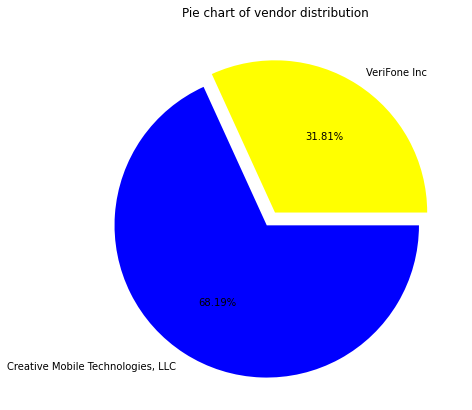

In [48]:
values = df1['VendorID'].value_counts().values
freq = df1['VendorID'].value_counts().index
fig = plt.figure(figsize = (17,7))
fig.add_subplot(1,2,1)
plt.title('Pie chart of vendor distribution')
colors = ['blue','yellow']
labels = ['Creative Mobile Technologies, LLC','VeriFone lnc']
explode = [0.1,0]
plt.pie(values, colors=colors, labels=labels, explode=explode,autopct='%.2f%%', counterclock =False)

D:\All\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Bar graph of payment method'}, xlabel='Vendors', ylabel='Frequency'>

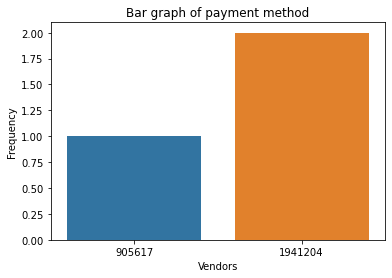

In [49]:
#1= Credit card 2= Cash 3= No charge 4= Dispute
plt.title('Bar graph of payment method')
plt.xlabel('Vendors')
plt.ylabel('Frequency')
sns.barplot(values,freq)

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

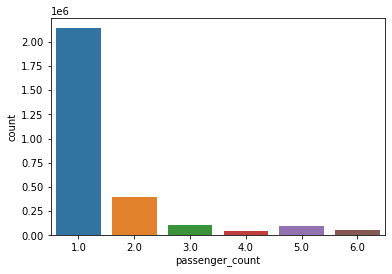

In [50]:
sns.countplot(x = df1['passenger_count'], data = df1)

<AxesSubplot:xlabel='payment_type', ylabel='count'>

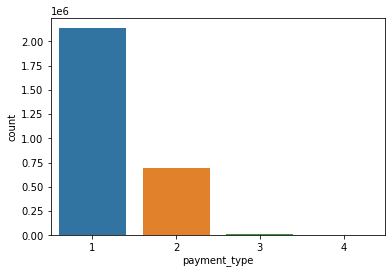

In [51]:
#1=Creditcard 2=Cash 3=Nocharge 4=Dispute
sns.countplot(x = df1['payment_type'], data = df1)

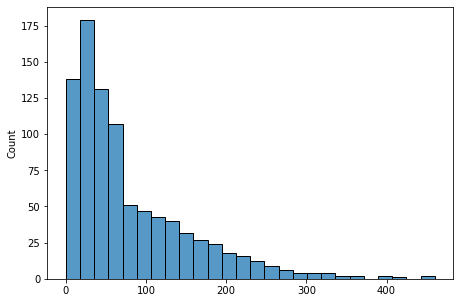

In [52]:
freq1 = df1['fare_amount'].value_counts().index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(freq1)
plt.show()

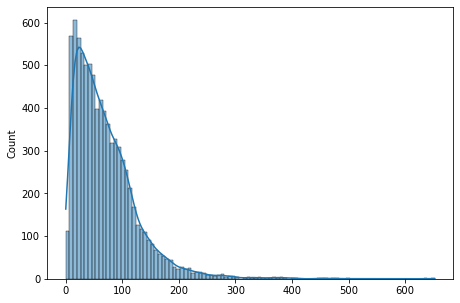

In [53]:
freq1 = df1['total_amount'].value_counts().index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(freq1,kde=True)
plt.show()

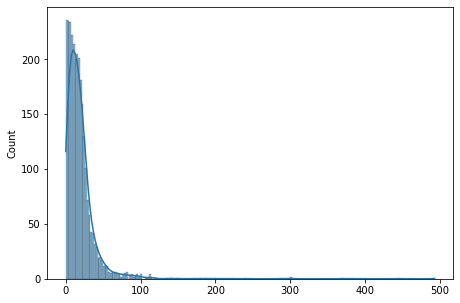

In [54]:
freq1 = df1['tip_amount'].value_counts().index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(freq1,kde=True)
plt.show()

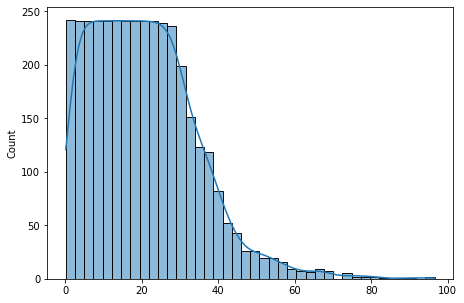

In [55]:
freq1 = df1['trip_distance'].value_counts().index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(freq1,kde=True)
plt.show()

In [56]:
df1['Pickup Day'] = df1['tpep_pickup_datetime'].dt.day_name()

<AxesSubplot:xlabel='Pickup Day', ylabel='count'>

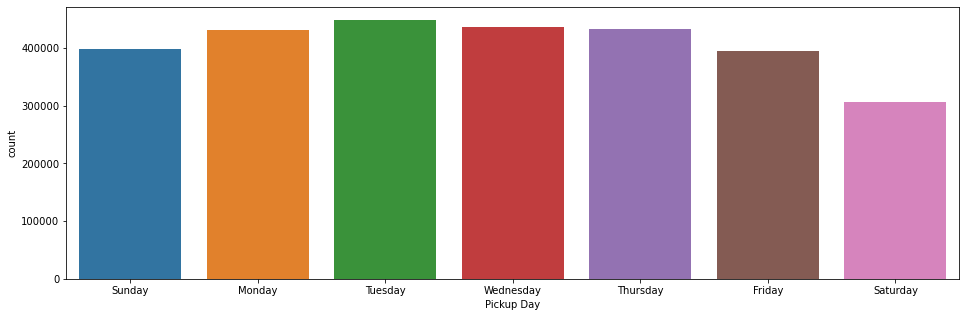

In [57]:
plt.figure(figsize=(16,5))
sns.countplot(x = 'Pickup Day',data =df1)

<AxesSubplot:>

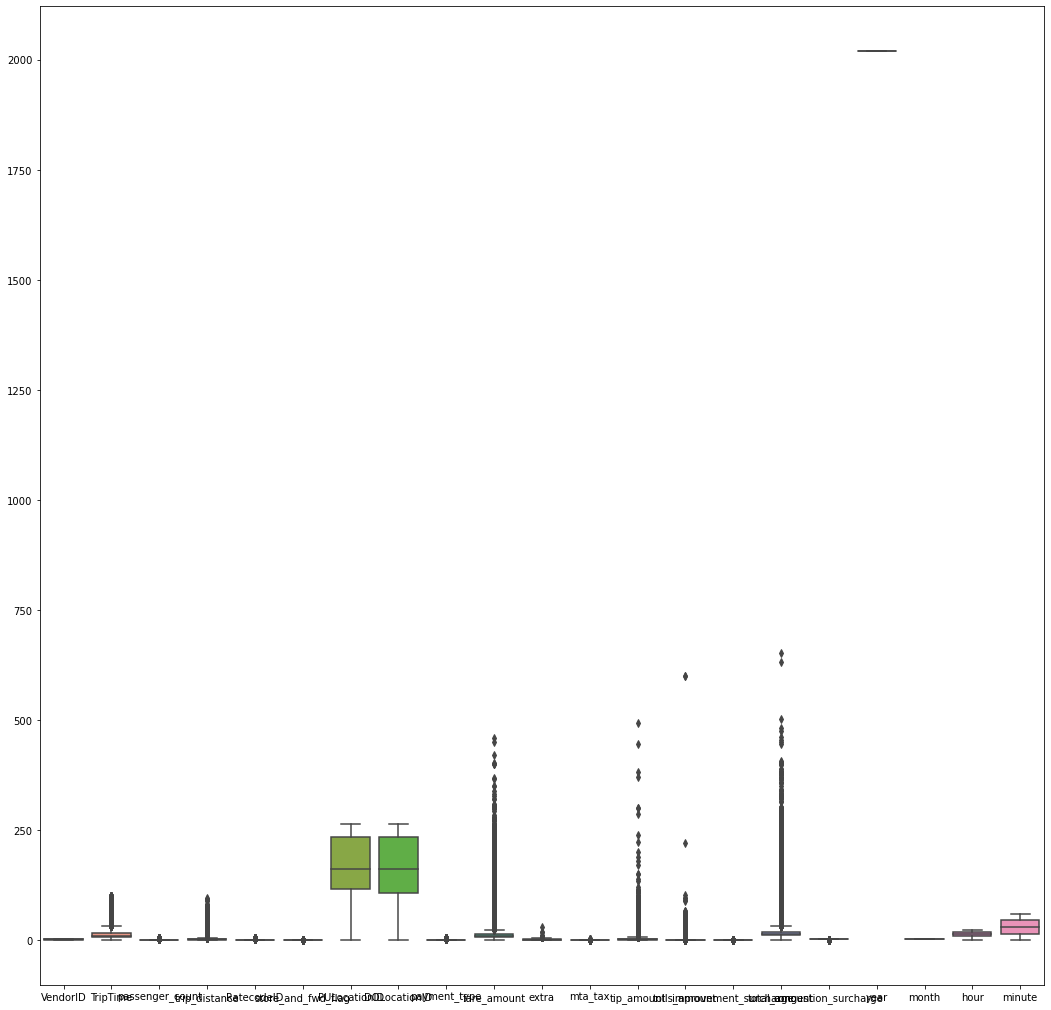

In [58]:
# 1.2 Find outliers.
# Outliers are the values of variables, that lies far away from other values
# Diff methods Inter quartile range, Boxplots, DBSCAN
#Method - Boxplots
plt.figure(figsize = (18,18))
sns.boxplot(data= df1)


In [61]:
df1['Pickup Day'] = df1['Pickup Day'].replace(['Sunday','Monday','Tuesday','Wednesday','Thursday',
                                             'Friday','Saturday'],['1','2','3','4','5','6','7'])

In [62]:
df3 = df1.drop(['tpep_dropoff_datetime','tpep_pickup_datetime','year','month','hour','minute','Pickup Day'], axis=1)
df3

,VendorID,TripTime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,30.483333,1.0,4.70,1.0,0.0,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
2,1,6.966667,1.0,1.10,1.0,0.0,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2,3.066667,2.0,0.87,1.0,0.0,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
5,1,18.566667,1.0,3.50,1.0,1.0,113,142,1,15.0,3.0,0.5,3.75,0.0,0.3,22.55,2.5
6,1,31.250000,1.0,14.10,1.0,1.0,237,14,1,40.5,3.0,0.5,8.85,0.0,0.3,53.15,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969874,2,2.833333,5.0,0.52,1.0,0.0,236,236,2,4.0,0.5,0.5,0.00,0.0,0.3,7.80,2.5
2969875,2,10.983333,5.0,2.35,1.0,0.0,263,166,1,10.5,0.5,0.5,2.86,0.0,0.3,17.16,2.5
2969876,2,7.100000,5.0,1.33,1.0,0.0,140,162,1,7.0,0.5,0.5,2.20,0.0,0.3,13.00,2.5
2969877,2,3.333333,6.0,0.87,1.0,0.0,140,229,1,5.0,0.5,0.5,2.64,0.0,0.3,11.44,2.5


### Speed

In [63]:
df3['speed'] =df3['trip_distance'] / df3['TripTime']*60

Text(0.5, 0, 'Speed of Taxi')

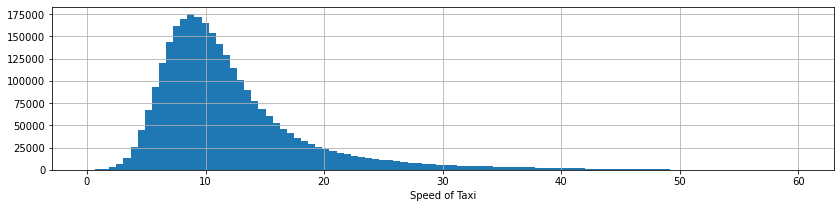

In [64]:
# plot histogram of speed
df3[df3.speed <60].speed.hist(bins=100, figsize=(14,3))
plt.xlabel('Speed of Taxi')

### Heatmap

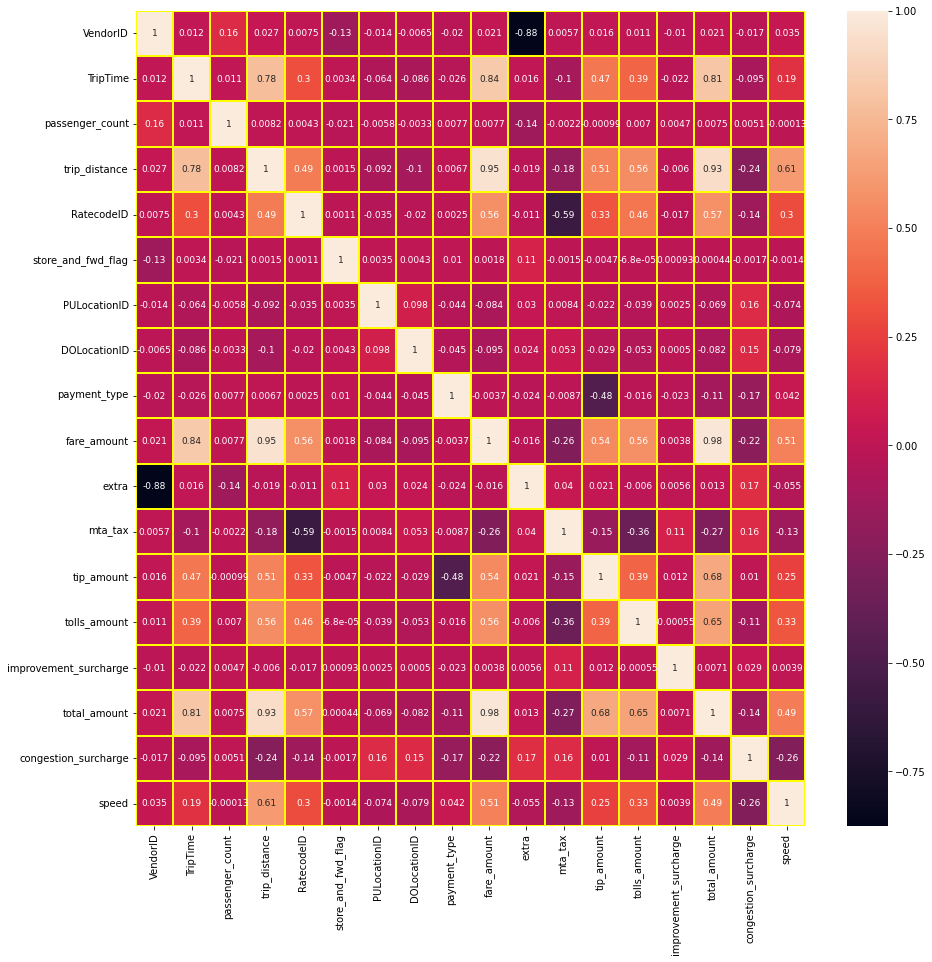

In [65]:
corr = df3.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, annot_kws={"size": 9},linewidths=2, linecolor='yellow')
plt.show()

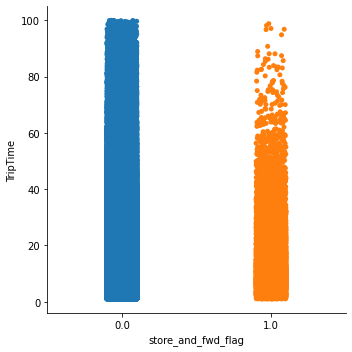

In [66]:
# graph indicates whether the trip record was held in vehicle memory before sending to the vendor
#aka “store and forward,” because the vehicle did not have a connection to the server.
sns.catplot(y='TripTime',x='store_and_fwd_flag', data =df1,kind='strip')

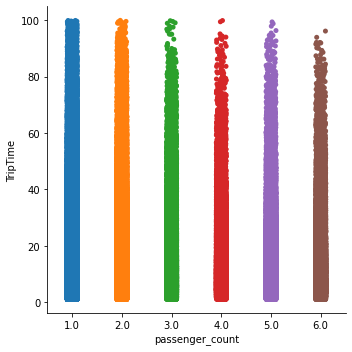

In [67]:
sns.catplot(y='TripTime',x='passenger_count', data =df1,kind='strip')

<AxesSubplot:xlabel='hour', ylabel='count'>

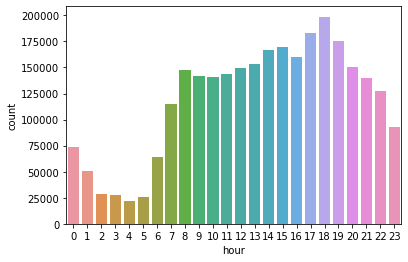

In [68]:
sns.countplot(x='hour', data=df1)

Text(0.5, 0, 'Fare')

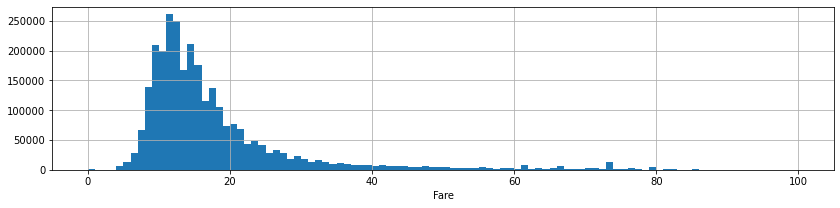

In [69]:
# plot histogram of fare
df1[df1.total_amount<100].total_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('Fare')

Text(0.5, 0, 'Tip')

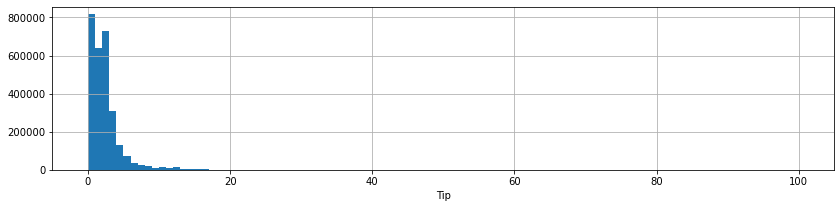

In [70]:
# plot histogram of fare
df1[df1.tip_amount<100].tip_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('Tip')

## January 2020 

In [71]:
dataframeJan=df2
df2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,NaN
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,NaN
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,NaN
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,NaN
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2,2020-01-31 23:08:00,2020-01-31 23:34:00,NaN,12.07,NaN,None,191,35,0,52.18,2.75,0.5,0.00,0.00,0.3,55.73,NaN,NaN
6405004,2,2020-01-31 23:00:00,2020-01-31 23:44:00,NaN,23.48,NaN,None,186,117,0,54.01,2.75,0.5,0.00,6.12,0.3,63.68,NaN,NaN
6405005,2,2020-01-31 23:13:00,2020-01-31 23:38:00,NaN,12.09,NaN,None,164,131,0,38.02,2.75,0.5,0.00,6.12,0.3,47.69,NaN,NaN
6405006,2,2020-01-31 23:02:54,2020-01-31 23:27:10,NaN,11.65,NaN,None,10,16,0,28.74,2.75,0.0,0.00,0.00,0.3,31.79,NaN,NaN


In [72]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,6405008.0,1.673002,0.469126,1.00,1.00,2.00,2.00,5.00
passenger_count,6339567.0,1.515333,1.151594,0.00,1.00,1.00,2.00,9.00
trip_distance,6405008.0,2.929644,83.159106,-30.62,0.96,1.60,2.93,210240.07
RatecodeID,6339567.0,1.059908,0.811843,1.00,1.00,1.00,1.00,99.00
PULocationID,6405008.0,164.732258,65.543739,1.00,132.00,162.00,234.00,265.00
DOLocationID,6405008.0,162.662691,69.912606,1.00,113.00,162.00,234.00,265.00
payment_type,6405008.0,1.257319,0.488567,0.00,1.00,1.00,2.00,5.00
fare_amount,6405008.0,12.694108,12.127295,-1238.00,6.50,9.00,14.00,4265.00
extra,6405008.0,1.115456,1.260054,-27.00,0.00,0.50,2.50,113.01
mta_tax,6405008.0,0.492318,0.073742,-0.50,0.50,0.50,0.50,30.80


In [73]:
## check if dataframe has any null values
df2.isnull().values.any()

True

In [74]:
df2.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            65441
trip_distance                  0
RatecodeID                 65441
store_and_fwd_flag         65441
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       65441
airport_fee              6405008
dtype: int64

In [75]:
# Separate features
df2 = df2.drop(['airport_fee'], axis = 1)

In [76]:
df2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2,2020-01-31 23:08:00,2020-01-31 23:34:00,NaN,12.07,NaN,None,191,35,0,52.18,2.75,0.5,0.00,0.00,0.3,55.73,NaN
6405004,2,2020-01-31 23:00:00,2020-01-31 23:44:00,NaN,23.48,NaN,None,186,117,0,54.01,2.75,0.5,0.00,6.12,0.3,63.68,NaN
6405005,2,2020-01-31 23:13:00,2020-01-31 23:38:00,NaN,12.09,NaN,None,164,131,0,38.02,2.75,0.5,0.00,6.12,0.3,47.69,NaN
6405006,2,2020-01-31 23:02:54,2020-01-31 23:27:10,NaN,11.65,NaN,None,10,16,0,28.74,2.75,0.0,0.00,0.00,0.3,31.79,NaN


In [77]:
train_stats = tfdv.generate_statistics_from_dataframe(df2)
tfdv.visualize_statistics(train_stats)

### Data Transformation

In [78]:
df2.insert(loc=1,column='TripTime',value='0')

In [79]:
df2['TripTime'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds() / 60
df2

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,4.800000,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1,7.416667,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1,6.183333,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1,4.850000,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2,2.300000,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2,26.000000,2020-01-31 23:08:00,2020-01-31 23:34:00,NaN,12.07,NaN,None,191,35,0,52.18,2.75,0.5,0.00,0.00,0.3,55.73,NaN
6405004,2,44.000000,2020-01-31 23:00:00,2020-01-31 23:44:00,NaN,23.48,NaN,None,186,117,0,54.01,2.75,0.5,0.00,6.12,0.3,63.68,NaN
6405005,2,25.000000,2020-01-31 23:13:00,2020-01-31 23:38:00,NaN,12.09,NaN,None,164,131,0,38.02,2.75,0.5,0.00,6.12,0.3,47.69,NaN
6405006,2,24.266667,2020-01-31 23:02:54,2020-01-31 23:27:10,NaN,11.65,NaN,None,10,16,0,28.74,2.75,0.0,0.00,0.00,0.3,31.79,NaN


In [80]:
df2.store_and_fwd_flag.value_counts()

N    6271447
Y      68120
Name: store_and_fwd_flag, dtype: int64

In [81]:
df2 = df2.replace({'N':0,'Y':1})

In [82]:
df2.VendorID.value_counts()

2    4310564
1    2094439
5          5
Name: VendorID, dtype: int64

In [83]:
df2.drop(df2[(df2.VendorID > 2)].index)

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,4.800000,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,0.0,238,239,1,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1,7.416667,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,0.0,239,238,1,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1,6.183333,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,0.0,238,238,1,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1,4.850000,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,0.0,238,151,1,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2,2.300000,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,0.0,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2,26.000000,2020-01-31 23:08:00,2020-01-31 23:34:00,NaN,12.07,NaN,NaN,191,35,0,52.18,2.75,0.5,0.00,0.00,0.3,55.73,NaN
6405004,2,44.000000,2020-01-31 23:00:00,2020-01-31 23:44:00,NaN,23.48,NaN,NaN,186,117,0,54.01,2.75,0.5,0.00,6.12,0.3,63.68,NaN
6405005,2,25.000000,2020-01-31 23:13:00,2020-01-31 23:38:00,NaN,12.09,NaN,NaN,164,131,0,38.02,2.75,0.5,0.00,6.12,0.3,47.69,NaN
6405006,2,24.266667,2020-01-31 23:02:54,2020-01-31 23:27:10,NaN,11.65,NaN,NaN,10,16,0,28.74,2.75,0.0,0.00,0.00,0.3,31.79,NaN


In [84]:
df2.payment_type.value_counts()

1    4694897
2    1593834
0      65441
3      32770
4      18065
5          1
Name: payment_type, dtype: int64

In [85]:
df2 = df2.drop(df2[(df2.payment_type < 1)].index)

In [86]:
df2.payment_type.value_counts()

1    4694897
2    1593834
3      32770
4      18065
5          1
Name: payment_type, dtype: int64

In [87]:
df2.trip_distance.value_counts()

0.90     117827
0.80     117234
1.00     116409
0.70     111748
1.10     111463
          ...  
59.32         1
38.61         1
42.69         1
31.98         1
48.48         1
Name: trip_distance, Length: 4498, dtype: int64

In [88]:
df2[df2['trip_distance'] < 0.1]

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4,2,2.300000,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,0.0,193,193,2,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
5,2,0.883333,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,0.0,7,193,2,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
6,2,0.066667,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,0.0,193,193,1,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0
7,2,1.166667,2019-12-18 15:27:49,2019-12-18 15:28:59,1.0,0.00,5.0,0.0,193,193,1,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5
8,2,1.000000,2019-12-18 15:30:35,2019-12-18 15:31:35,4.0,0.00,1.0,0.0,193,193,1,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339465,2,1.983333,2020-01-31 23:54:51,2020-01-31 23:56:50,1.0,0.05,2.0,0.0,132,132,2,52.00,0.0,0.5,0.00,0.0,0.3,52.80,0.0
6339482,2,0.116667,2020-02-01 00:00:07,2020-02-01 00:00:14,1.0,0.00,5.0,0.0,265,264,1,228.00,0.0,0.5,45.76,0.0,0.3,274.56,0.0
6339489,2,8.100000,2020-01-31 23:55:57,2020-02-01 00:04:03,1.0,0.00,1.0,0.0,114,114,2,6.50,0.5,0.5,0.00,0.0,0.3,10.30,2.5
6339508,1,1.050000,2020-01-31 23:14:54,2020-01-31 23:15:57,1.0,0.00,1.0,0.0,132,132,3,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0


In [89]:
# 82262 rows are droped
df2 = df2.drop(df2[(df2.trip_distance < 0.1)].index)

In [90]:
df2.passenger_count.value_counts()

1.0    4481919
2.0     937249
3.0     248246
5.0     224322
6.0     131508
4.0     121927
0.0     112107
7.0         14
9.0          7
8.0          6
Name: passenger_count, dtype: int64

In [91]:
df2 [df2['passenger_count'] < 1]

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
262,1,9.083333,2020-01-01 00:30:01,2020-01-01 00:39:06,0.0,1.4,1.0,0.0,234,114,1,7.5,3.0,0.5,2.25,0.00,0.3,13.55,2.5
263,1,9.250000,2020-01-01 00:40:50,2020-01-01 00:50:05,0.0,1.5,1.0,0.0,114,137,1,8.0,3.0,0.5,2.35,0.00,0.3,14.15,2.5
264,1,13.850000,2020-01-01 00:54:17,2020-01-01 01:08:08,0.0,2.5,1.0,1.0,137,144,2,11.5,3.0,0.5,0.00,0.00,0.3,15.30,2.5
279,1,10.500000,2020-01-01 00:34:58,2020-01-01 00:45:28,0.0,2.8,1.0,0.0,145,224,2,11.0,3.0,0.5,0.00,6.12,0.3,20.92,2.5
281,1,15.150000,2020-01-01 00:55:25,2020-01-01 01:10:34,0.0,2.6,1.0,0.0,137,140,1,11.5,3.0,0.5,3.05,0.00,0.3,18.35,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339069,1,32.250000,2020-01-31 23:10:10,2020-01-31 23:42:25,0.0,15.9,1.0,0.0,132,145,1,46.0,0.5,0.5,10.00,0.00,0.3,57.30,0.0
6339070,1,6.216667,2020-01-31 23:51:26,2020-01-31 23:57:39,0.0,1.9,1.0,0.0,229,107,1,7.5,3.0,0.5,2.25,0.00,0.3,13.55,2.5
6339526,1,5.983333,2020-01-31 23:51:21,2020-01-31 23:57:20,0.0,0.8,1.0,0.0,79,148,1,6.0,3.0,0.5,1.76,0.00,0.3,11.56,2.5
6339537,1,7.750000,2020-01-31 23:43:08,2020-01-31 23:50:53,0.0,1.1,1.0,0.0,234,186,2,7.0,3.0,0.5,0.00,0.00,0.3,10.80,2.5


In [92]:
# dropped a row which timespan was 16.96 hours
df2 = df2.drop(df2[(df2.passenger_count < 1)].index)
df2 = df2.drop(df2[(df2.passenger_count > 6)].index)

In [93]:
df2.TripTime.value_counts()

6.500000       7501
6.166667       7464
7.683333       7357
6.333333       7348
7.516667       7338
               ... 
1391.716667       1
621.283333        1
1375.466667       1
1386.800000       1
1387.150000       1
Name: TripTime, Length: 11456, dtype: int64

In [94]:
#2770.366667 minutes equals to 46 hours and trip_distance=3.5 miles with total_amount=0.0$
df2 [df2['TripTime'] < 0]

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
540040,1,-2770.366667,2020-01-04 08:19:55,2020-01-02 10:09:33,1.0,3.5,1.0,0.0,107,237,1,16.5,2.5,0.5,4.95,0.0,0.3,24.75,2.5


In [95]:
#6337150 [triptime = 0.40sec  distance=14.10 miles] but total_amount = 70$
df2 [df2['TripTime'] < 1]

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
372,2,0.866667,2020-01-01 00:57:13,2020-01-01 00:58:05,1.0,0.11,1.0,0.0,260,260,3,-2.50,-0.5,-0.5,0.0,0.0,-0.3,-3.80,0.0
373,2,0.866667,2020-01-01 00:57:13,2020-01-01 00:58:05,1.0,0.11,1.0,0.0,260,260,2,2.50,0.5,0.5,0.0,0.0,0.3,3.80,0.0
667,2,0.866667,2020-01-01 00:36:31,2020-01-01 00:37:23,3.0,0.18,1.0,0.0,141,141,3,-3.00,-0.5,-0.5,0.0,0.0,-0.3,-6.80,-2.5
668,2,0.866667,2020-01-01 00:36:31,2020-01-01 00:37:23,3.0,0.18,1.0,0.0,141,141,2,3.00,0.5,0.5,0.0,0.0,0.3,6.80,2.5
2057,1,0.983333,2020-01-01 00:46:50,2020-01-01 00:47:49,1.0,1.00,1.0,0.0,233,233,1,7.00,3.0,0.5,2.0,0.0,0.3,12.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6337150,1,0.400000,2020-01-31 23:46:55,2020-01-31 23:47:19,1.0,14.10,5.0,0.0,137,137,1,65.00,0.0,0.0,5.0,0.0,0.3,70.30,0.0
6337662,2,0.933333,2020-01-31 23:04:30,2020-01-31 23:05:26,1.0,0.10,1.0,0.0,161,161,2,2.50,0.5,0.5,0.0,0.0,0.3,6.30,2.5
6338111,2,0.883333,2020-01-31 23:13:05,2020-01-31 23:13:58,3.0,0.27,1.0,0.0,170,161,1,3.00,0.5,0.5,1.7,0.0,0.3,8.50,2.5
6338936,2,0.083333,2020-01-31 23:17:09,2020-01-31 23:17:14,1.0,3.41,5.0,0.0,113,113,1,60.00,0.0,0.5,0.0,0.0,0.3,60.80,0.0


In [96]:
# 13908  rows are droped
df2 = df2.drop(df2[(df2.TripTime < 1)].index)

In [97]:
#2770.366667 minutes equals to 46 hours and trip_distance=3.5 miles with total_amount=0.0$
df2 [df2['TripTime'] >100 ]

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1117,2,1438.183333,2020-01-01 00:30:07,2020-01-02 00:28:18,1.0,0.35,1.0,0.0,166,166,1,3.5,0.5,0.5,0.00,0.00,0.3,4.80,0.0
1471,2,1366.800000,2020-01-01 00:41:24,2020-01-01 23:28:12,1.0,6.97,1.0,0.0,137,49,1,22.0,0.5,0.5,3.87,0.00,0.3,29.67,2.5
1478,2,1405.000000,2020-01-01 00:53:40,2020-01-02 00:18:40,6.0,3.96,1.0,0.0,246,261,1,17.5,0.5,0.5,4.26,0.00,0.3,27.51,2.5
1882,2,1438.716667,2020-01-01 00:38:39,2020-01-02 00:37:22,2.0,1.03,1.0,0.0,114,79,1,6.5,0.5,0.5,2.58,0.00,0.3,12.88,2.5
2184,2,1399.166667,2019-12-31 16:18:17,2020-01-01 15:37:27,1.0,1.22,1.0,0.0,142,48,2,12.5,0.5,0.5,0.00,0.00,0.3,16.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336755,2,1427.616667,2020-01-31 23:31:01,2020-02-01 23:18:38,2.0,1.68,1.0,0.0,230,237,1,8.0,0.5,0.5,0.59,0.00,0.3,12.39,2.5
6336877,2,1387.150000,2020-01-31 23:02:38,2020-02-01 22:09:47,1.0,3.39,5.0,0.0,100,265,1,55.0,0.0,0.5,10.51,11.75,0.3,80.56,2.5
6337830,2,1435.916667,2020-01-31 23:59:44,2020-02-01 23:55:39,2.0,1.18,1.0,0.0,114,148,2,8.0,0.5,0.5,0.00,0.00,0.3,11.80,2.5
6338176,2,1437.000000,2020-01-31 23:17:16,2020-02-01 23:14:16,1.0,1.40,1.0,0.0,141,233,1,9.5,0.5,0.5,1.33,0.00,0.3,14.63,2.5


In [98]:
 # dropped a row which timespan was 16.96 hours
df2 = df2.drop(df2[(df2.TripTime > 100)].index)

### DateTime

In [99]:
df2['year'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.year
df2['month'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.month
df2['hour'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.hour
df2['minute'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.minute

In [100]:
df2['year'].value_counts()

2020    6116807
2019        105
2009         16
2008          5
2021          3
Name: year, dtype: int64

In [101]:
# dropped a rows which year is not 2020 
df2 = df2.drop(df2[(df2.year < 2018)].index)
df2 = df2.drop(df2[(df2.year > 2020)].index)

In [102]:
df2['year'].value_counts()

2020    6116807
2019        105
Name: year, dtype: int64

### Rate Code

In [103]:
df2.RatecodeID.value_counts()

1.0     5945060
2.0      143425
3.0       12128
5.0       11261
4.0        4893
99.0        137
6.0           8
Name: RatecodeID, dtype: int64

In [104]:
# dropped a row which ratecode is 99    rate code is not mentioned in meta data
df2 = df2.drop(df2[(df2.RatecodeID == 99)].index)

### Fare amount 

In [105]:
df2 [df2['total_amount'] > 1000]

,VendorID,TripTime,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,hour,minute
4268194,2,8.066667,2020-01-22 16:41:24,2020-01-22 16:49:28,1.0,0.55,1.0,0.0,231,209,...,0.5,1100.0,0.0,0.3,1110.8,2.5,2020,1,16,41


In [106]:
# dropped a row which fare amount is less than 1 $ 
df2 = df2.drop(df2[(df2.total_amount < 0)].index)
df2 = df2.drop(df2[(df2.total_amount > 1000)].index)

In [107]:
df4 = df2.drop(['tpep_dropoff_datetime','tpep_pickup_datetime','year','month','hour','minute'], axis=1)

In [108]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,6102434.0,1.682107,0.465658,1.0,1.000000,2.000000,2.000000,2.000000
TripTime,6102434.0,13.063588,9.695923,1.0,6.466667,10.483333,16.666667,99.983333
passenger_count,6102434.0,1.545631,1.145860,1.0,1.000000,1.000000,2.000000,6.000000
trip_distance,6102434.0,2.886927,3.740791,0.1,1.000000,1.600000,2.900000,100.150000
RatecodeID,6102434.0,1.037155,0.257988,1.0,1.000000,1.000000,1.000000,6.000000
store_and_fwd_flag,6102434.0,0.009994,0.099469,0.0,0.000000,0.000000,0.000000,1.000000
PULocationID,6102434.0,165.119580,65.297170,1.0,132.000000,162.000000,234.000000,265.000000
DOLocationID,6102434.0,162.909938,69.677453,1.0,113.000000,162.000000,234.000000,265.000000
payment_type,6102434.0,1.259936,0.453478,1.0,1.000000,1.000000,2.000000,4.000000
fare_amount,6102434.0,12.346816,10.876221,0.0,6.500000,9.000000,13.500000,520.020000


In [109]:
train_stats = tfdv.generate_statistics_from_dataframe(df4)
tfdv.visualize_statistics(train_stats)

### Comparison Jan 2020 and March 2020

In [110]:
train_stats1 = tfdv.generate_statistics_from_dataframe(df3)
train_stats2 = tfdv.generate_statistics_from_dataframe(df4)
tfdv.visualize_statistics(train_stats1,train_stats2, lhs_name='March_2020',rhs_name='January 2020')

<AxesSubplot:xlabel='hour', ylabel='count'>

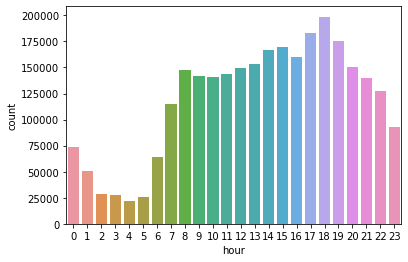

In [59]:
sns.countplot(x='hour', data=df1)

<AxesSubplot:xlabel='hour', ylabel='count'>

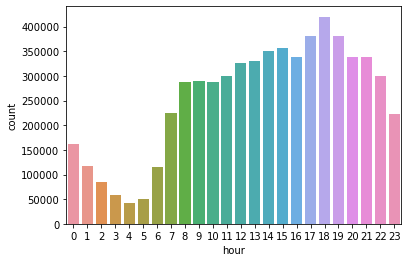

In [111]:
sns.countplot(x='hour', data=df2)

In [112]:
df2['Pickup Day'] = df2['tpep_pickup_datetime'].dt.day_name()

<AxesSubplot:xlabel='Pickup Day', ylabel='count'>

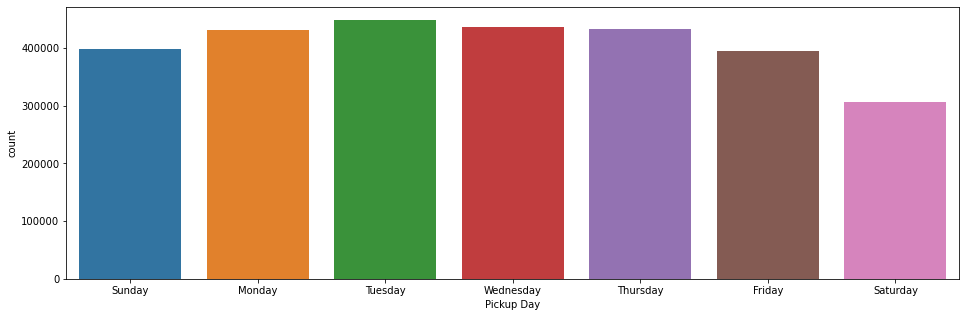

In [60]:
plt.figure(figsize=(16,5))
sns.countplot(x = 'Pickup Day',data =df1)

<AxesSubplot:xlabel='Pickup Day', ylabel='count'>

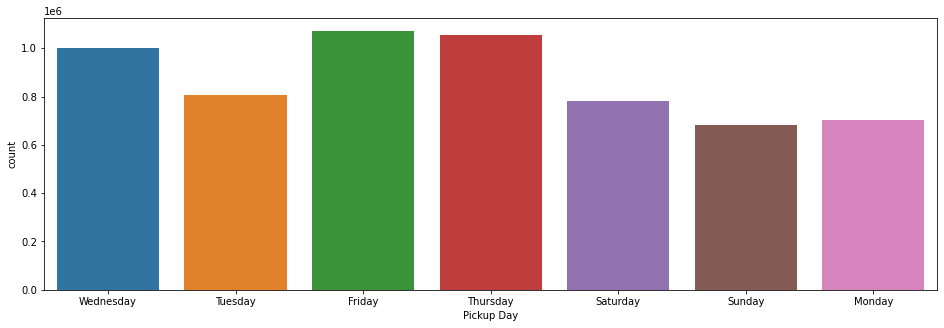

In [113]:
plt.figure(figsize=(16,5))
sns.countplot(x = 'Pickup Day',data =df2)

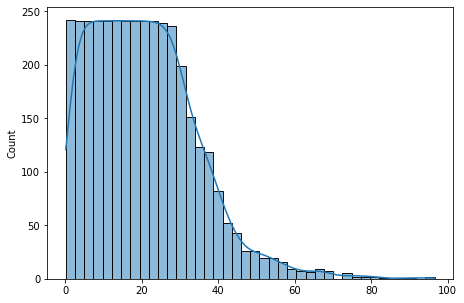

In [114]:
freq1 = df1['trip_distance'].value_counts().index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(freq1,kde=True)
plt.show()

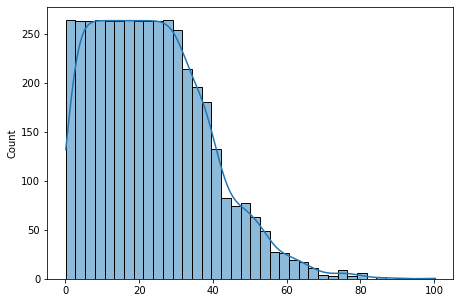

In [115]:
freq1 = df4['trip_distance'].value_counts().index
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(freq1,kde=True)
plt.show()

In [132]:
#conda install pandas-profiling

In [133]:
#conda install -c conda-forge pandas-profiling

In [116]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df2.sample(n=1000))
profile.to_file(output_file="output_min.html")